Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Data Collection

In [ ]:
# Load the dataset from an online source
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

# Preview
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


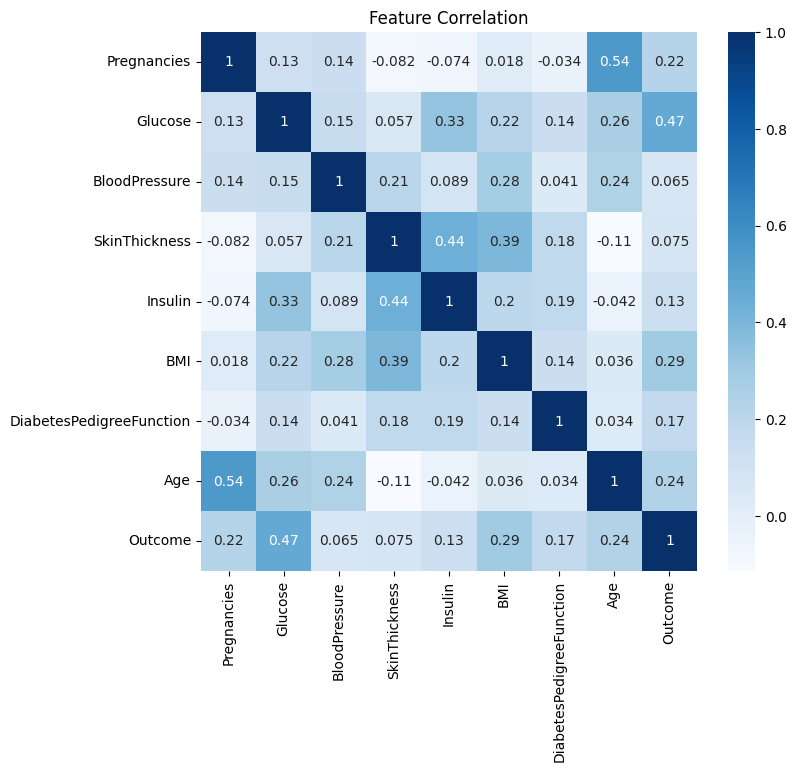

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation")
plt.show()


Prepare the data


In [ ]:
# Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train the model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Evaluate the Model

In [ ]:
# Define column names same as training set
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create input as a DataFrame with feature names
user_input = pd.DataFrame([[5, 166, 72, 19, 175, 25.8, 0.587, 51]], columns=columns)

# Scale and predict
scaled_input = scaler.transform(user_input)
prediction = model.predict(scaled_input)
probability = model.predict_proba(scaled_input)[0][1]

# Display result
if prediction[0] == 1:
    print(f"🔴 The person is likely diabetic. (Confidence: {probability:.2f})")
else:
    print(f"🟢 The person is likely not diabetic. (Confidence: {1 - probability:.2f})")


🔴 The person is likely diabetic. (Confidence: 0.65)
